In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
astr = pd.read_csv("Asteroid_dataset.csv", low_memory = False)
astr

,id,spkid,full_name,pdes,name,prefix,neo,pha,H,diameter,...,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,class,rms
0,a0000001,2000001,1 Ceres,1,Ceres,NaN,N,N,3.400,939.400,...,4.608900e-09,6.168800e-08,6.624800e-08,7.820700e-09,1.111300e-11,1.196500e-12,3.782900e-08,9.415900e-09,MBA,0.43301
1,a0000002,2000002,2 Pallas,2,Pallas,NaN,N,N,4.200,545.000,...,3.469400e-06,6.272400e-06,9.128200e-06,8.859100e-06,4.961300e-09,4.653600e-10,4.078700e-05,3.680700e-06,MBA,0.35936
2,a0000003,2000003,3 Juno,3,Juno,NaN,N,N,5.330,246.596,...,3.223100e-06,1.664600e-05,1.772100e-05,8.110400e-06,4.363900e-09,4.413400e-10,3.528800e-05,3.107200e-06,MBA,0.33848
3,a0000004,2000004,4 Vesta,4,Vesta,NaN,N,N,3.000,525.400,...,2.170600e-07,3.880800e-07,1.789300e-07,1.206800e-06,1.648600e-09,2.612500e-10,4.103700e-06,1.274900e-06,MBA,0.39980
4,a0000005,2000005,5 Astraea,5,Astraea,NaN,N,N,6.900,106.699,...,2.740800e-06,2.894900e-05,2.984200e-05,8.303800e-06,4.729000e-09,5.522700e-10,3.474300e-05,3.490500e-06,MBA,0.52191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
958519,bPLS6013,3246801,(6013 P-L),6013 P-L,NaN,NaN,N,N,17.135,NaN,...,6.969000e+00,7.433000e+00,4.631100e+01,2.738300e+01,1.041200e+00,1.652100e-01,1.309700e+02,7.264900e+02,MBA,0.23839
958520,bPLS6331,3246834,(6331 P-L),6331 P-L,NaN,NaN,N,N,18.500,NaN,...,1.563500e-05,5.598600e-05,2.380400e-04,1.298200e-04,2.418900e-08,3.346100e-09,4.690200e-04,1.578500e-05,MBA,0.53633
958521,bPLS6344,3013075,(6344 P-L),6344 P-L,NaN,NaN,Y,Y,20.400,NaN,...,1.853300e-05,5.691700e-05,8.969200e-05,5.272600e-05,1.650100e-07,1.101600e-08,2.830600e-04,9.127500e-05,APO,0.51556
958522,bT2S2060,3246457,(2060 T-2),2060 T-2,NaN,NaN,N,N,18.071,NaN,...,5.448800e-01,4.391600e+00,1.898800e+01,1.083800e+01,7.171600e-01,1.016700e-01,3.898400e+01,5.035500e+02,MBA,0.25641


In [4]:
astr.head()

,id,spkid,full_name,pdes,name,prefix,neo,pha,H,diameter,...,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,class,rms
0,a0000001,2000001,1 Ceres,1,Ceres,NaN,N,N,3.40,939.400,...,4.608900e-09,6.168800e-08,6.624800e-08,7.820700e-09,1.111300e-11,1.196500e-12,3.782900e-08,9.415900e-09,MBA,0.43301
1,a0000002,2000002,2 Pallas,2,Pallas,NaN,N,N,4.20,545.000,...,3.469400e-06,6.272400e-06,9.128200e-06,8.859100e-06,4.961300e-09,4.653600e-10,4.078700e-05,3.680700e-06,MBA,0.35936
2,a0000003,2000003,3 Juno,3,Juno,NaN,N,N,5.33,246.596,...,3.223100e-06,1.664600e-05,1.772100e-05,8.110400e-06,4.363900e-09,4.413400e-10,3.528800e-05,3.107200e-06,MBA,0.33848
3,a0000004,2000004,4 Vesta,4,Vesta,NaN,N,N,3.00,525.400,...,2.170600e-07,3.880800e-07,1.789300e-07,1.206800e-06,1.648600e-09,2.612500e-10,4.103700e-06,1.274900e-06,MBA,0.39980
4,a0000005,2000005,5 Astraea,5,Astraea,NaN,N,N,6.90,106.699,...,2.740800e-06,2.894900e-05,2.984200e-05,8.303800e-06,4.729000e-09,5.522700e-10,3.474300e-05,3.490500e-06,MBA,0.52191


In [5]:
astr.shape

(958524, 45)

In [6]:
astr.describe()

,spkid,H,diameter,albedo,diameter_sigma,epoch,epoch_mjd,epoch_cal,e,a,...,sigma_q,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,rms
count,9.585240e+05,952261.000000,136209.000000,135103.000000,136081.000000,9.585240e+05,958524.000000,9.585240e+05,958524.000000,958524.000000,...,9.386020e+05,9.386020e+05,9.386020e+05,9.386020e+05,9.386020e+05,9.385980e+05,9.386020e+05,9.386020e+05,9.385980e+05,958522.000000
mean,3.810114e+06,16.906411,5.506429,0.130627,0.479184,2.458869e+06,58868.781950,2.019693e+07,0.156116,2.902143,...,1.982929e+01,1.168449e+00,5.310234e+00,1.370062e+06,1.369977e+06,2.131453e+01,5.060221e-02,4.312780e+08,8.525815e+04,0.561153
std,6.831541e+06,1.790405,9.425164,0.110323,0.782895,7.016716e+02,701.671573,1.930354e+04,0.092643,39.719503,...,2.903785e+03,1.282231e+02,1.333381e+03,9.158996e+08,9.158991e+08,7.197034e+03,9.814953e+00,2.953046e+11,2.767681e+07,2.745700
min,2.000001e+06,-1.100000,0.002500,0.001000,0.000500,2.425052e+06,25051.000000,1.927062e+07,0.000000,-14702.447872,...,1.956900e-11,4.608900e-09,6.168800e-08,6.624800e-08,7.820700e-09,1.111300e-11,1.196500e-12,3.782900e-08,9.415900e-09,0.000000
25%,2.239632e+06,16.100000,2.780000,0.053000,0.180000,2.459000e+06,59000.000000,2.020053e+07,0.092193,2.387835,...,1.462000e-07,6.095900e-06,3.619400e-05,5.755000e-05,2.573700e-05,2.340900e-08,2.768800e-09,1.110900e-04,1.794500e-05,0.518040
50%,2.479262e+06,16.900000,3.972000,0.079000,0.332000,2.459000e+06,59000.000000,2.020053e+07,0.145002,2.646969,...,2.271900e-07,8.688800e-06,6.642550e-05,1.047100e-04,4.900100e-05,4.359000e-08,4.638000e-09,2.230800e-04,3.501700e-05,0.566280
75%,3.752518e+06,17.714000,5.765000,0.190000,0.620000,2.459000e+06,59000.000000,2.020053e+07,0.200650,3.001932,...,6.583200e-07,1.591500e-05,1.609775e-04,3.114400e-04,1.718900e-04,1.196600e-07,1.124000e-08,8.139600e-04,9.775475e-05,0.613927
max,5.401723e+07,33.200000,939.400000,1.000000,140.000000,2.459000e+06,59000.000000,2.020053e+07,1.855356,33488.895955,...,1.015000e+06,5.533000e+04,1.199100e+06,8.845100e+11,8.845100e+11,5.509700e+06,7.698800e+03,2.853100e+14,1.910700e+10,2686.600000


In [7]:
astr.dtypes

id                 object
spkid               int64
full_name          object
pdes               object
name               object
prefix             object
neo                object
pha                object
H                 float64
diameter          float64
albedo            float64
diameter_sigma    float64
orbit_id           object
epoch             float64
epoch_mjd           int64
epoch_cal         float64
equinox            object
e                 float64
a                 float64
q                 float64
i                 float64
om                float64
w                 float64
ma                float64
ad                float64
n                 float64
tp                float64
tp_cal            float64
per               float64
per_y             float64
moid              float64
moid_ld           float64
sigma_e           float64
sigma_a           float64
sigma_q           float64
sigma_i           float64
sigma_om          float64
sigma_w           float64
sigma_ma    

In [8]:
astr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 958524 entries, 0 to 958523
Data columns (total 45 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              958524 non-null  object 
 1   spkid           958524 non-null  int64  
 2   full_name       958524 non-null  object 
 3   pdes            958524 non-null  object 
 4   name            22064 non-null   object 
 5   prefix          18 non-null      object 
 6   neo             958520 non-null  object 
 7   pha             938603 non-null  object 
 8   H               952261 non-null  float64
 9   diameter        136209 non-null  float64
 10  albedo          135103 non-null  float64
 11  diameter_sigma  136081 non-null  float64
 12  orbit_id        958524 non-null  object 
 13  epoch           958524 non-null  float64
 14  epoch_mjd       958524 non-null  int64  
 15  epoch_cal       958524 non-null  float64
 16  equinox         958524 non-null  object 
 17  e         

In [9]:
astr.nunique()

id                958524
spkid             958524
full_name         958524
pdes              958524
name               22064
prefix                 1
neo                    2
pha                    2
H                   9489
diameter           16591
albedo              1057
diameter_sigma      3054
orbit_id            4690
epoch               5246
epoch_mjd           5246
epoch_cal           5246
equinox                1
e                 958444
a                 958509
q                 958509
i                 958414
om                958518
w                 958519
ma                958519
ad                958505
n                 958514
tp                958519
tp_cal            958499
per               958510
per_y             958511
moid              314300
moid_ld           314301
sigma_e           254740
sigma_a           273297
sigma_q           248138
sigma_i           215741
sigma_om          223155
sigma_w           262719
sigma_ma          266816
sigma_ad          269241


In [10]:
astr.isnull().sum()

id                     0
spkid                  0
full_name              0
pdes                   0
name              936460
prefix            958506
neo                    4
pha                19921
H                   6263
diameter          822315
albedo            823421
diameter_sigma    822443
orbit_id               0
epoch                  0
epoch_mjd              0
epoch_cal              0
equinox                0
e                      0
a                      0
q                      0
i                      0
om                     0
w                      0
ma                     1
ad                     4
n                      0
tp                     0
tp_cal                 0
per                    4
per_y                  1
moid               19921
moid_ld              127
sigma_e            19922
sigma_a            19922
sigma_q            19922
sigma_i            19922
sigma_om           19922
sigma_w            19922
sigma_ma           19922
sigma_ad           19926


In [11]:
astr.index

RangeIndex(start=0, stop=958524, step=1)

In [12]:
astr.columns

Index(['id', 'spkid', 'full_name', 'pdes', 'name', 'prefix', 'neo', 'pha', 'H',
       'diameter', 'albedo', 'diameter_sigma', 'orbit_id', 'epoch',
       'epoch_mjd', 'epoch_cal', 'equinox', 'e', 'a', 'q', 'i', 'om', 'w',
       'ma', 'ad', 'n', 'tp', 'tp_cal', 'per', 'per_y', 'moid', 'moid_ld',
       'sigma_e', 'sigma_a', 'sigma_q', 'sigma_i', 'sigma_om', 'sigma_w',
       'sigma_ma', 'sigma_ad', 'sigma_n', 'sigma_tp', 'sigma_per', 'class',
       'rms'],
      dtype='object')

In [13]:
categorical_columns = astr.select_dtypes(include=['object']).columns
print(categorical_columns)


Index(['id', 'full_name', 'pdes', 'name', 'prefix', 'neo', 'pha', 'orbit_id',
       'equinox', 'class'],
      dtype='object')


In [15]:
numeric_columns = astr.select_dtypes(include=['int', 'float']).columns
print(numeric_columns)


Index(['spkid', 'H', 'diameter', 'albedo', 'diameter_sigma', 'epoch',
       'epoch_mjd', 'epoch_cal', 'e', 'a', 'q', 'i', 'om', 'w', 'ma', 'ad',
       'n', 'tp', 'tp_cal', 'per', 'per_y', 'moid', 'moid_ld', 'sigma_e',
       'sigma_a', 'sigma_q', 'sigma_i', 'sigma_om', 'sigma_w', 'sigma_ma',
       'sigma_ad', 'sigma_n', 'sigma_tp', 'sigma_per', 'rms'],
      dtype='object')


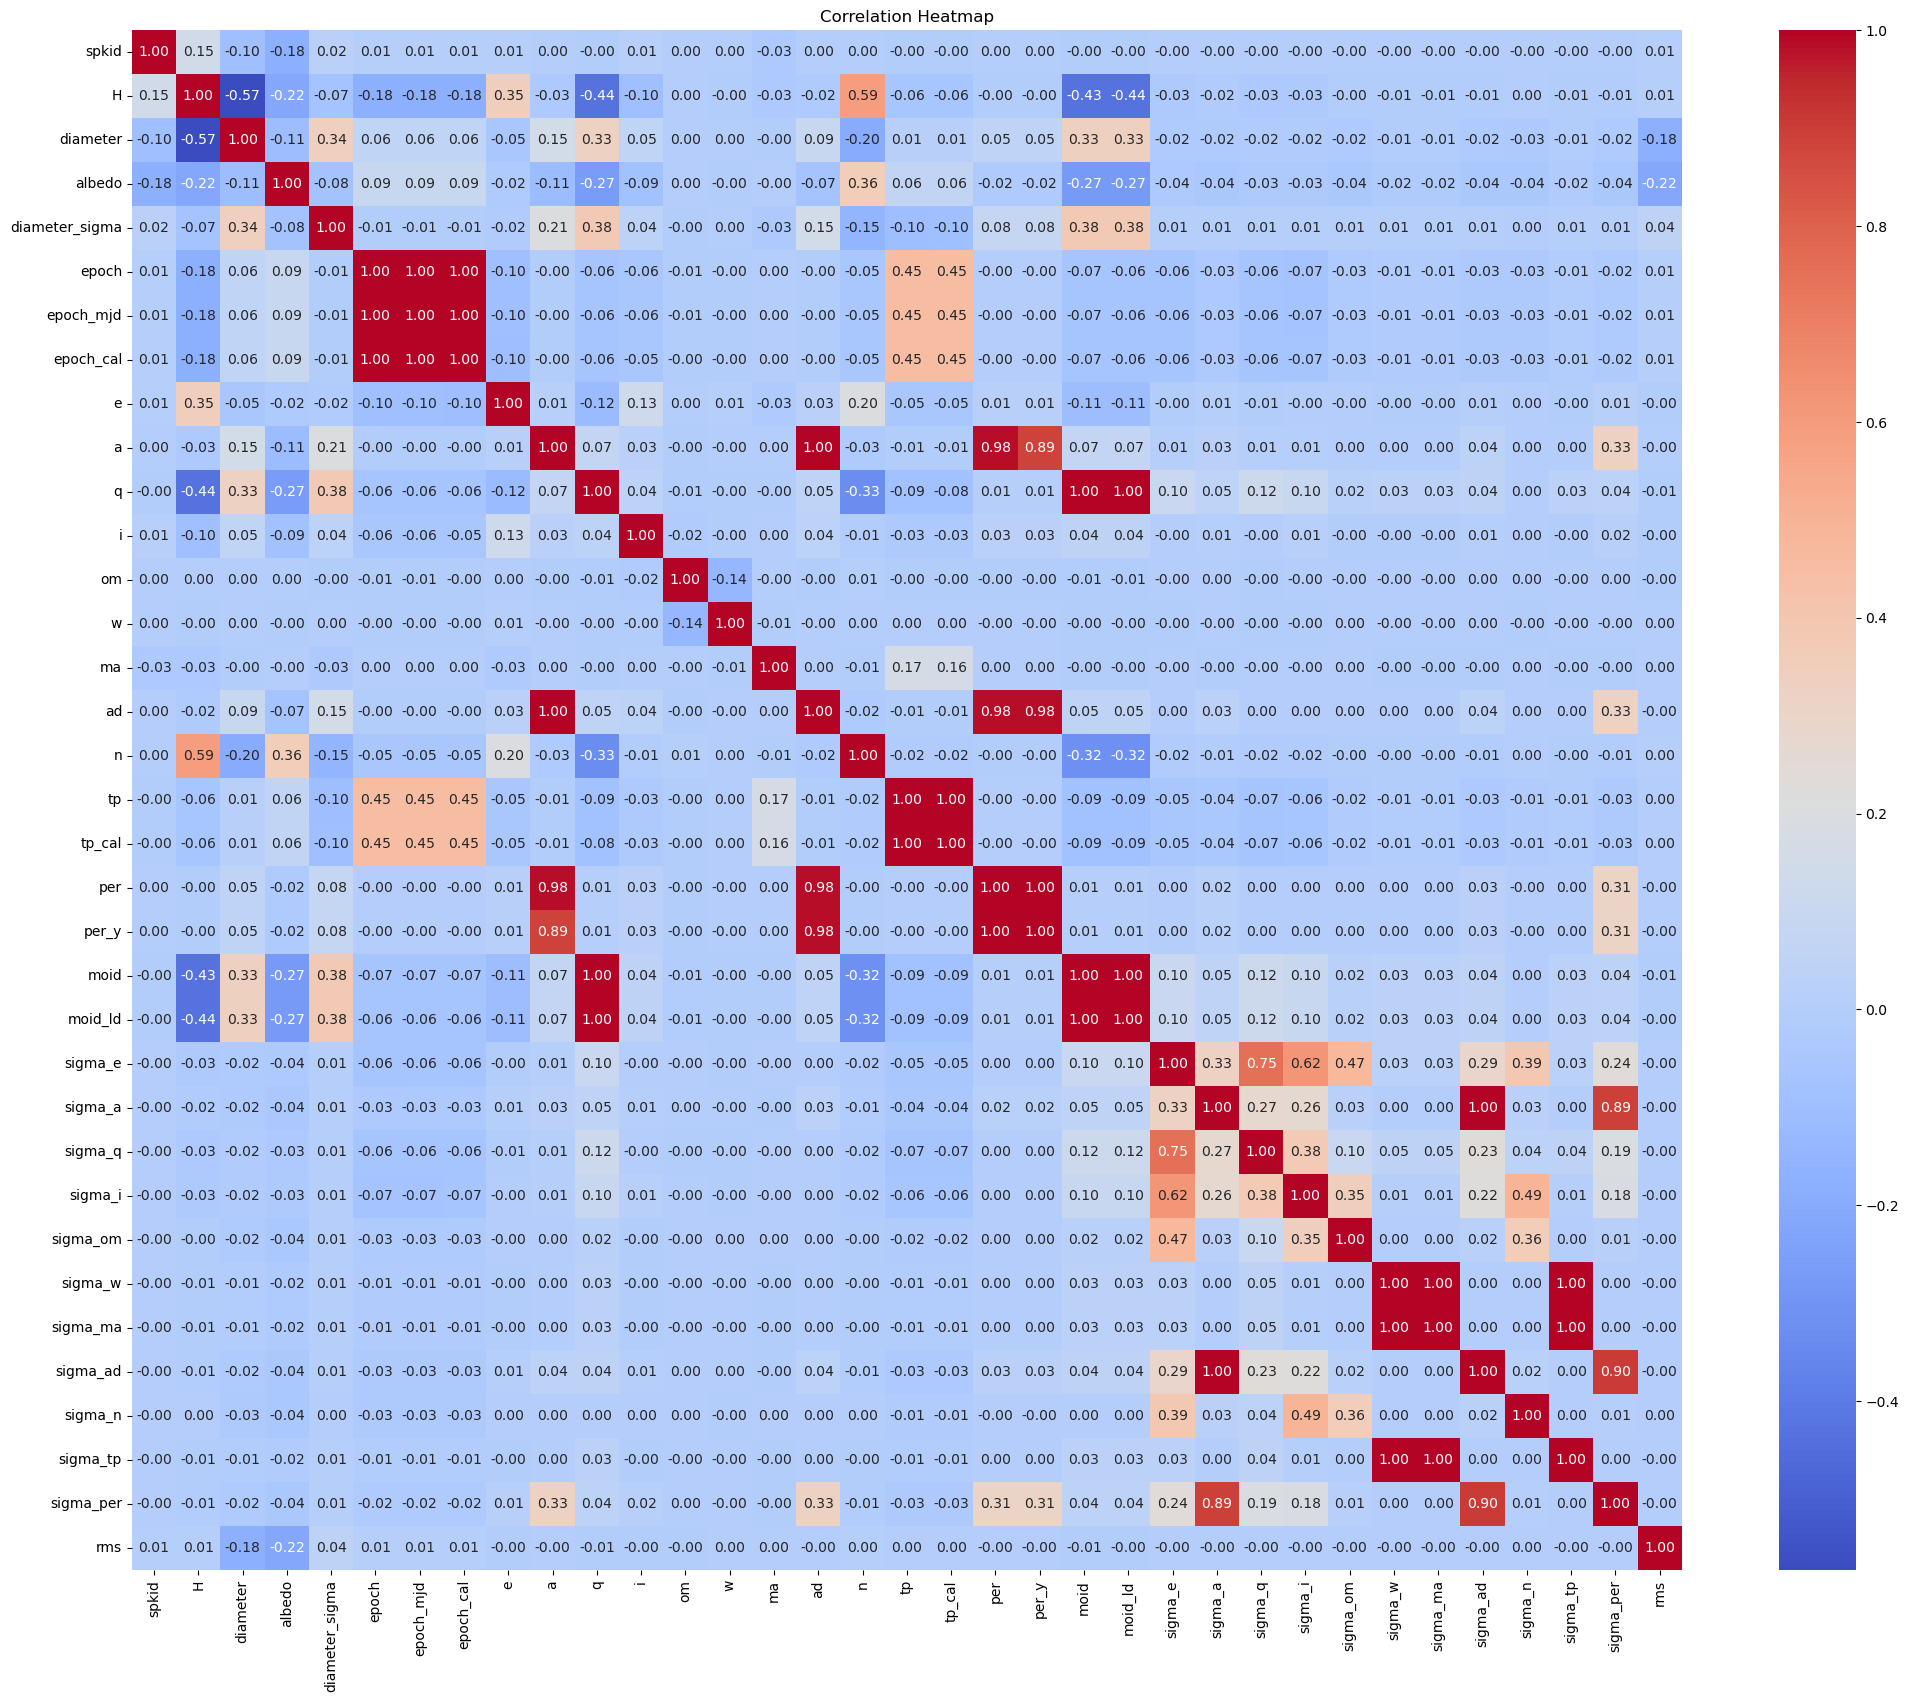

In [36]:
# Select only numeric columns
numeric_df = astr.select_dtypes(include=['int', 'float'])

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(25, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()



# Linear Regression

### 1.Data Selection and Cleaning:

In [11]:
# Selecting relevant columns and dropping rows with missing values
ad = astr[["H", "albedo","diameter"]].dropna()

### 2. Data Preparation:

In [12]:
# Splitting the data into features (x) and target variable (y)
X = ad['albedo'].values.reshape(-1, 1)
y = ad['H']

### 3. Train-Test Split:

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [15]:
print("Shapes - Train:", X_train.shape, y_train.shape)
print("Shapes - Test:", X_test.shape, y_test.shape)


Shapes - Train: (104989, 1) (104989,)
Shapes - Test: (26248, 1) (26248,)


### 4.Linear Regression Model:

In [16]:
model = LinearRegression()

#Training the model
model.fit(X_train, y_train)

LinearRegression()

### 5.Making Predictions

In [17]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

### 6. Evaluate the Model


In [19]:
# Model Evaluation and Print Statements
print(f"Train accuracy {round(model.score(X_train, y_train) * 100,2)} %") #r2 SQUARED for train set
print(f"Test accuracy {round(model.score(X_test, y_test) * 100,2)} %")
print("Yea, I have no idea.")
print("It seems that the lower an asteroid's reflectivity is, the wider range of brightness is can have.")
print("It also seems that the more reflective an asteroid is, the asteroid's brightness converges to 15 whatever units. I'm not an astronomer.")


Train accuracy 5.0 %
Test accuracy 4.57 %
Yea, I have no idea.
It seems that the lower an asteroid's reflectivity is, the wider range of brightness is can have.
It also seems that the more reflective an asteroid is, the asteroid's brightness converges to 15 whatever units. I'm not an astronomer.


### 7. Data Visualization

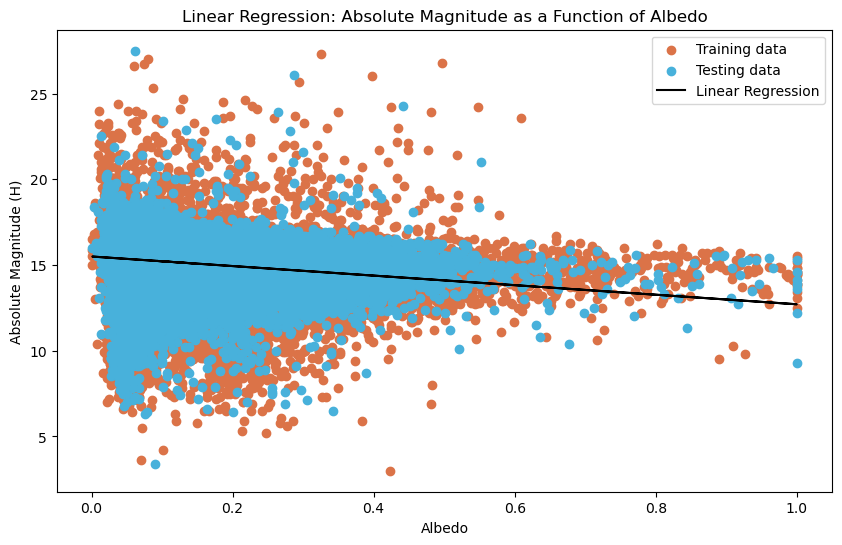

In [23]:
# Plotting the results
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color='#DB7348', label='Training data')
plt.scatter(X_test, y_test, color='#48B1DB', label='Testing data')
plt.plot(X_train, y_train_pred, color='black', label='Linear Regression')
plt.xlabel('Albedo')
plt.ylabel('Absolute Magnitude (H)')
plt.title('Linear Regression: Absolute Magnitude as a Function of Albedo')
plt.legend()
plt.show()

# Logrithmic Regression

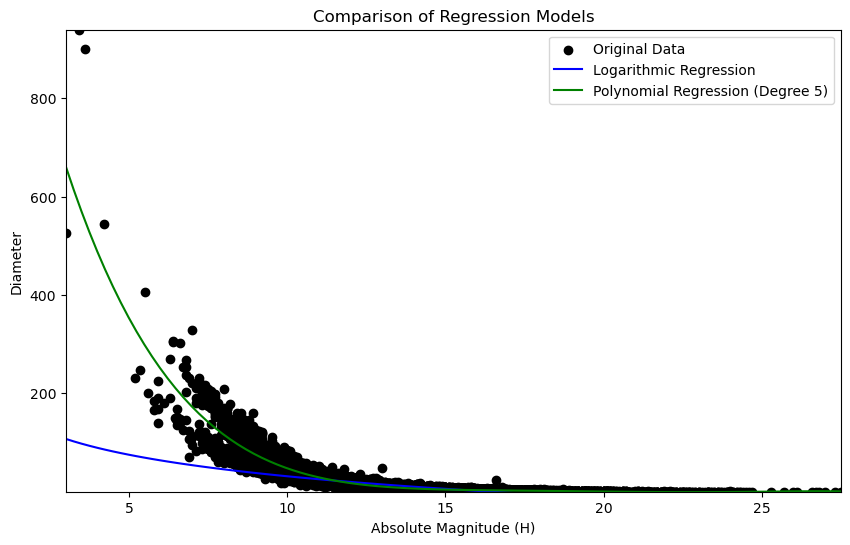

Logarithmic Model train score: 43.87%
Logarithmic Model test score: 39.12%
Polynomial Model (Degree 5) Train Score: 85.80%
Polynomial Model (Degree 5) Test Score: 86.12%

This was mainly to test different regression models.
The only uneducated opinion I can give is that the larger an asteroid is, the darker it looks.


In [24]:
# Logarithmic and Polynomial Regression Models
x_log = np.log(ad['H'].values).reshape(-1, 1)
y = ad['diameter'].values

x_train_log, x_test_log, y_train, y_test = train_test_split(x_log, y, test_size=0.2, random_state=42)

model_log = LinearRegression()
model_log.fit(x_train_log, y_train)

degree = 5
poly = PolynomialFeatures(degree)
x_poly = poly.fit_transform(ad['H'].values.reshape(-1, 1))

x_train_poly, x_test_poly, y_train_poly, y_test_poly = train_test_split(x_poly, y, test_size=0.2, random_state=42)

model_poly = LinearRegression()
model_poly.fit(x_train_poly, y_train_poly)

x_plot = np.linspace(ad['H'].min(), ad['H'].max(), 100).reshape(-1, 1)
y_plot_log = model_log.predict(np.log(x_plot).reshape(-1, 1))
y_plot_poly = model_poly.predict(poly.transform(x_plot))

plt.figure(figsize=(10, 6))
plt.scatter(ad['H'], ad['diameter'], color='black', label='Original Data')
plt.plot(x_plot, y_plot_log, color='blue', label='Logarithmic Regression')
plt.plot(x_plot, y_plot_poly, color='green', label=f'Polynomial Regression (Degree {degree})')
plt.xlim([ad['H'].min(), ad['H'].max()])
plt.ylim([y.min(), y.max()])
plt.xlabel('Absolute Magnitude (H)')
plt.ylabel('Diameter')
plt.title('Comparison of Regression Models')
plt.legend()
plt.show()

model_log_train_score = model_log.score(x_train_log, y_train)*100
model_log_test_score = model_log.score(x_test_log, y_test)*100
print(f'Logarithmic Model train score: {model_log_train_score:.2f}%')
print(f'Logarithmic Model test score: {model_log_test_score:.2f}%')

model_poly_train_score = model_poly.score(x_train_poly, y_train_poly)*100
model_poly_test_score = model_poly.score(x_test_poly, y_test_poly)*100
print(f'Polynomial Model (Degree {degree}) Train Score: {model_poly_train_score:.2f}%')
print(f'Polynomial Model (Degree {degree}) Test Score: {model_poly_test_score:.2f}%')

print("\nThis was mainly to test different regression models.")
print("The only uneducated opinion I can give is that the larger an asteroid is, the darker it looks.")

# Logistic Regression

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Binarize the target variable (example: using a threshold of 15 for 'H')
threshold = 15
ad['target'] = (ad['H'] > threshold).astype(int)

# Feature and target variables
x = ad['albedo'].values.reshape(-1, 1)
Y = ad['target']

# Train-test split
x_train, x_test, Y_train, Y_test = train_test_split(x, Y, test_size=0.2, random_state=42)

# Logistic Regression model
model_logistic = LogisticRegression()
model_logistic.fit(x_train, Y_train)

# Predictions
Y_train_pred = model_logistic.predict(x_train)
Y_test_pred = model_logistic.predict(x_test)

# Model evaluation
train_accuracy = accuracy_score(Y_train, Y_train_pred)
test_accuracy = accuracy_score(Y_test, Y_test_pred)

# Displaying the results
print(f"Train accuracy: {round(train_accuracy * 100, 2)} %")
print(f"Test accuracy: {round(test_accuracy * 100, 2)} %")

# Confusion Matrix and Classification Report
conf_matrix = confusion_matrix(Y_test, Y_test_pred)
class_report = classification_report(Y_test, Y_test_pred)

print("\nConfusion Matrix:")
print(conf_matrix)

print("\nClassification Report:")
print(class_report)


Train accuracy: 62.49 %
Test accuracy: 61.67 %

Confusion Matrix:
[[ 4376  7367]
 [ 2693 11812]]

Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.37      0.47     11743
           1       0.62      0.81      0.70     14505

    accuracy                           0.62     26248
   macro avg       0.62      0.59      0.58     26248
weighted avg       0.62      0.62      0.60     26248



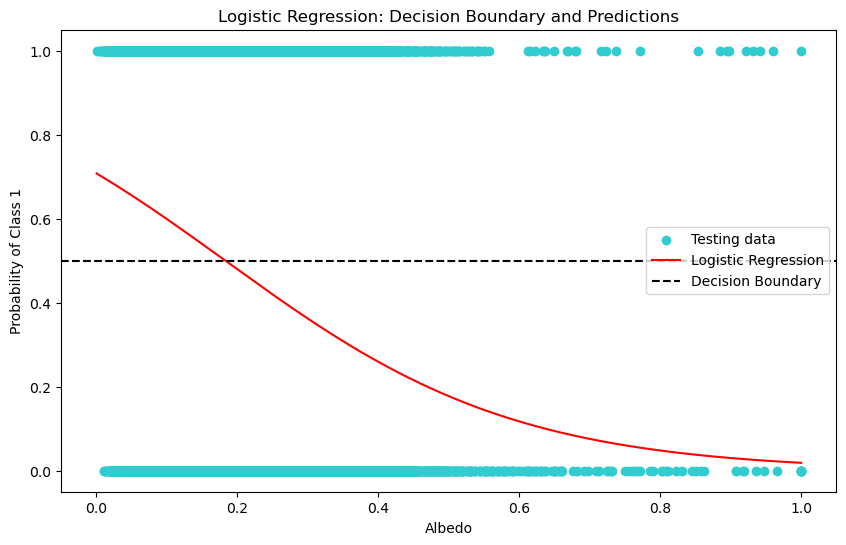

In [26]:
# Plot the decision boundary and data points
x_values = np.linspace(min(x_test), max(x_test), 1000).reshape(-1, 1)
Y_probabilities = model_logistic.predict_proba(x_values)[:, 1]

plt.figure(figsize=(10, 6))
plt.scatter(x_test, Y_test, color='#30CCCF', label='Testing data')
plt.plot(x_values, Y_probabilities, color='red', label='Logistic Regression')
plt.axhline(0.5, color='black', linestyle='--', label='Decision Boundary')
plt.xlabel('Albedo')
plt.ylabel('Probability of Class 1')
plt.title('Logistic Regression: Decision Boundary and Predictions')
plt.legend()
plt.show()

# Naive Bayes Classification

In [6]:

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.naive_bayes import GaussianNB  

# Binarize the target variable (example: using a threshold of 15 for 'H')
threshold = 15
ad['target'] = (ad['H'] > threshold).astype(int)

# Feature and target variables
x = ad['albedo'].values.reshape(-1, 1)
Y = ad['target']

# Train-test split
x_train, x_test, Y_train, Y_test = train_test_split(x, Y, test_size=0.2, random_state=42)

# Logistic Regression model
classifier = GaussianNB()  
classifier.fit(x_train, Y_train)

# Predictions
Y_train_pred = classifier.predict(x_train)
Y_test_pred = classifier.predict(x_test)

# Model evaluation
train_accuracy = accuracy_score(Y_train, Y_train_pred)
test_accuracy = accuracy_score(Y_test, Y_test_pred)

# Displaying the results
print(f"Train accuracy: {round(train_accuracy * 100, 2)} %")
print(f"Test accuracy: {round(test_accuracy * 100, 2)} %")

# Confusion Matrix and Classification Report
conf_matrix = confusion_matrix(Y_test, Y_test_pred)
class_report = classification_report(Y_test, Y_test_pred)

print("\nConfusion Matrix:")
print(conf_matrix)

print("\nClassification Report:")
print(class_report)


Train accuracy: 61.59 %
Test accuracy: 60.67 %

Confusion Matrix:
[[ 3766  7977]
 [ 2346 12159]]

Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.32      0.42     11743
           1       0.60      0.84      0.70     14505

    accuracy                           0.61     26248
   macro avg       0.61      0.58      0.56     26248
weighted avg       0.61      0.61      0.58     26248



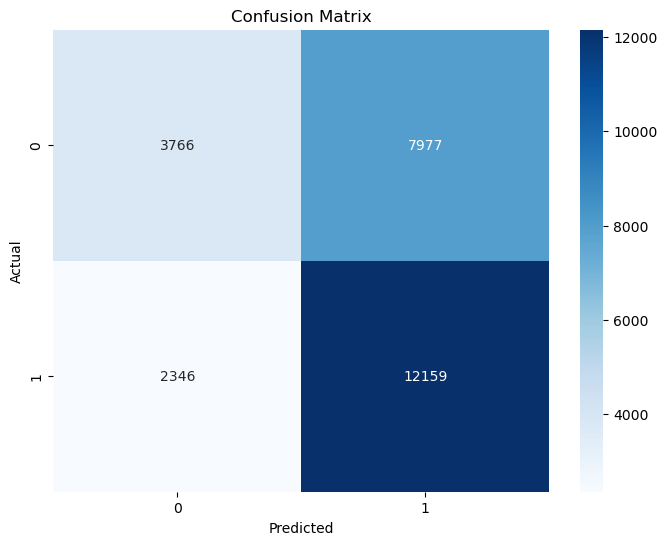

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


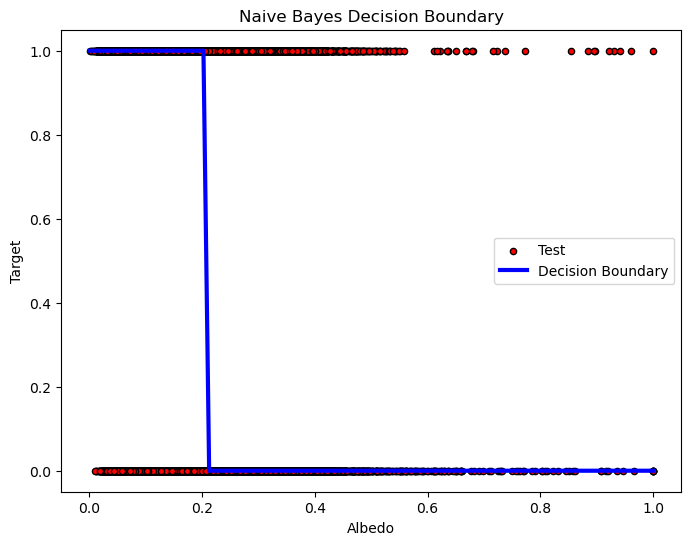

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Plot decision boundary
plt.figure(figsize=(8, 6))

# Plot decision boundary for test data
plt.scatter(x_test, Y_test, c='red', label='Test', edgecolors='k', s=20)

# Generate a range of albedo values
albedo_values = np.linspace(x.min(), x.max(), 100).reshape(-1, 1)

# Predictions
Y_pred = classifier.predict(albedo_values)

# Plot decision boundary
plt.plot(albedo_values, Y_pred, color='blue', linewidth=3, label='Decision Boundary')

plt.xlabel('Albedo')
plt.ylabel('Target')
plt.title('Naive Bayes Decision Boundary')
plt.legend()
plt.show()



## KNN Classifier

In [10]:

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier  

# Binarize the target variable (example: using a threshold of 15 for 'H')
threshold = 15
ad['target'] = (ad['H'] > threshold).astype(int)

# Feature and target variables
x = ad['albedo'].values.reshape(-1, 1)
Y = ad['target']

# Train-test split
x_train, x_test, Y_train, Y_test = train_test_split(x, Y, test_size=0.2, random_state=42)

# Logistic Regression model
classifier= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )   
classifier.fit(x_train, Y_train)

# Predictions
Y_train_pred = classifier.predict(x_train)
Y_test_pred = classifier.predict(x_test)

# Model evaluation
train_accuracy = accuracy_score(Y_train, Y_train_pred)
test_accuracy = accuracy_score(Y_test, Y_test_pred)

# Displaying the results
print(f"Train accuracy: {round(train_accuracy * 100, 2)} %")
print(f"Test accuracy: {round(test_accuracy * 100, 2)} %")

# Confusion Matrix and Classification Report
conf_matrix = confusion_matrix(Y_test, Y_test_pred)
class_report = classification_report(Y_test, Y_test_pred)

print("\nConfusion Matrix:")
print(conf_matrix)

print("\nClassification Report:")
print(class_report)


Train accuracy: 58.96 %
Test accuracy: 58.18 %

Confusion Matrix:
[[ 5243  6500]
 [ 4476 10029]]

Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.45      0.49     11743
           1       0.61      0.69      0.65     14505

    accuracy                           0.58     26248
   macro avg       0.57      0.57      0.57     26248
weighted avg       0.58      0.58      0.58     26248



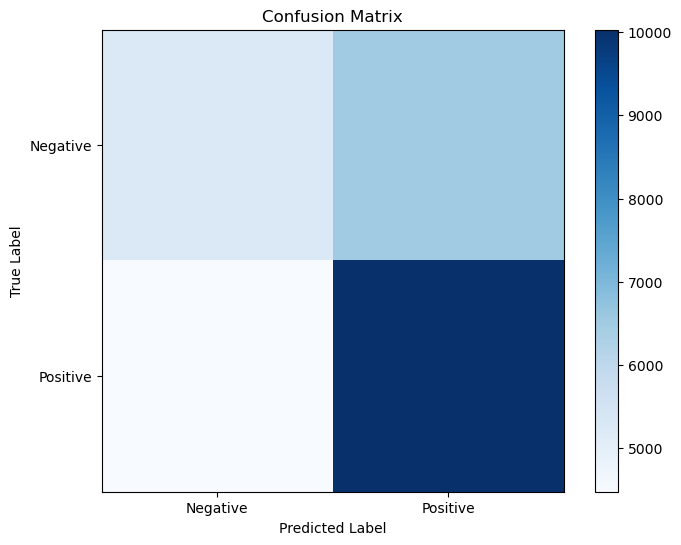

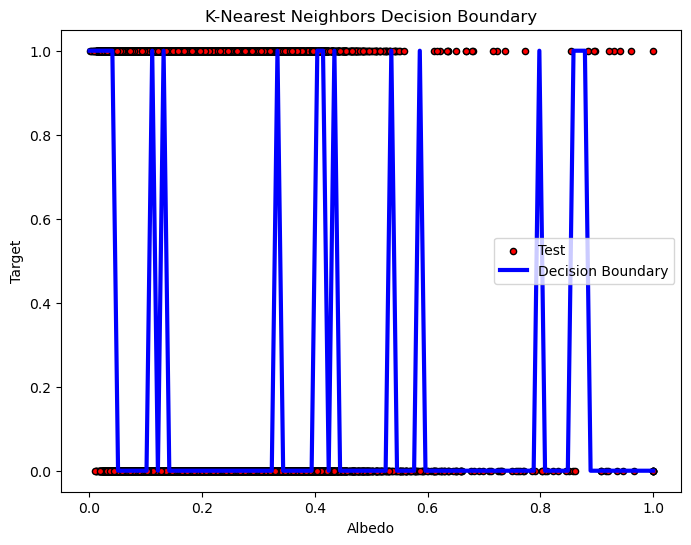

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
from matplotlib.colors import ListedColormap

# Plot confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks([0, 1], ['Negative', 'Positive'])
plt.yticks([0, 1], ['Negative', 'Positive'])
plt.show()

# Plot decision boundary
plt.figure(figsize=(8, 6))

# Plot decision boundary for test data
plt.scatter(x_test, Y_test, c='red', label='Test', edgecolors='k', s=20)

# Generate a range of albedo values
albedo_values = np.linspace(x.min(), x.max(), 100).reshape(-1, 1)

# Predictions
Y_pred = classifier.predict(albedo_values)

# Plot decision boundary
plt.plot(albedo_values, Y_pred, color='blue', linewidth=3, label='Decision Boundary')

plt.xlabel('Albedo')
plt.ylabel('Target')
plt.title('K-Nearest Neighbors Decision Boundary')
plt.legend()
plt.show()
